In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   IPython.display                    import  display
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
#from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("train_(1).csv", parse_dates=True,index_col = 'Month')

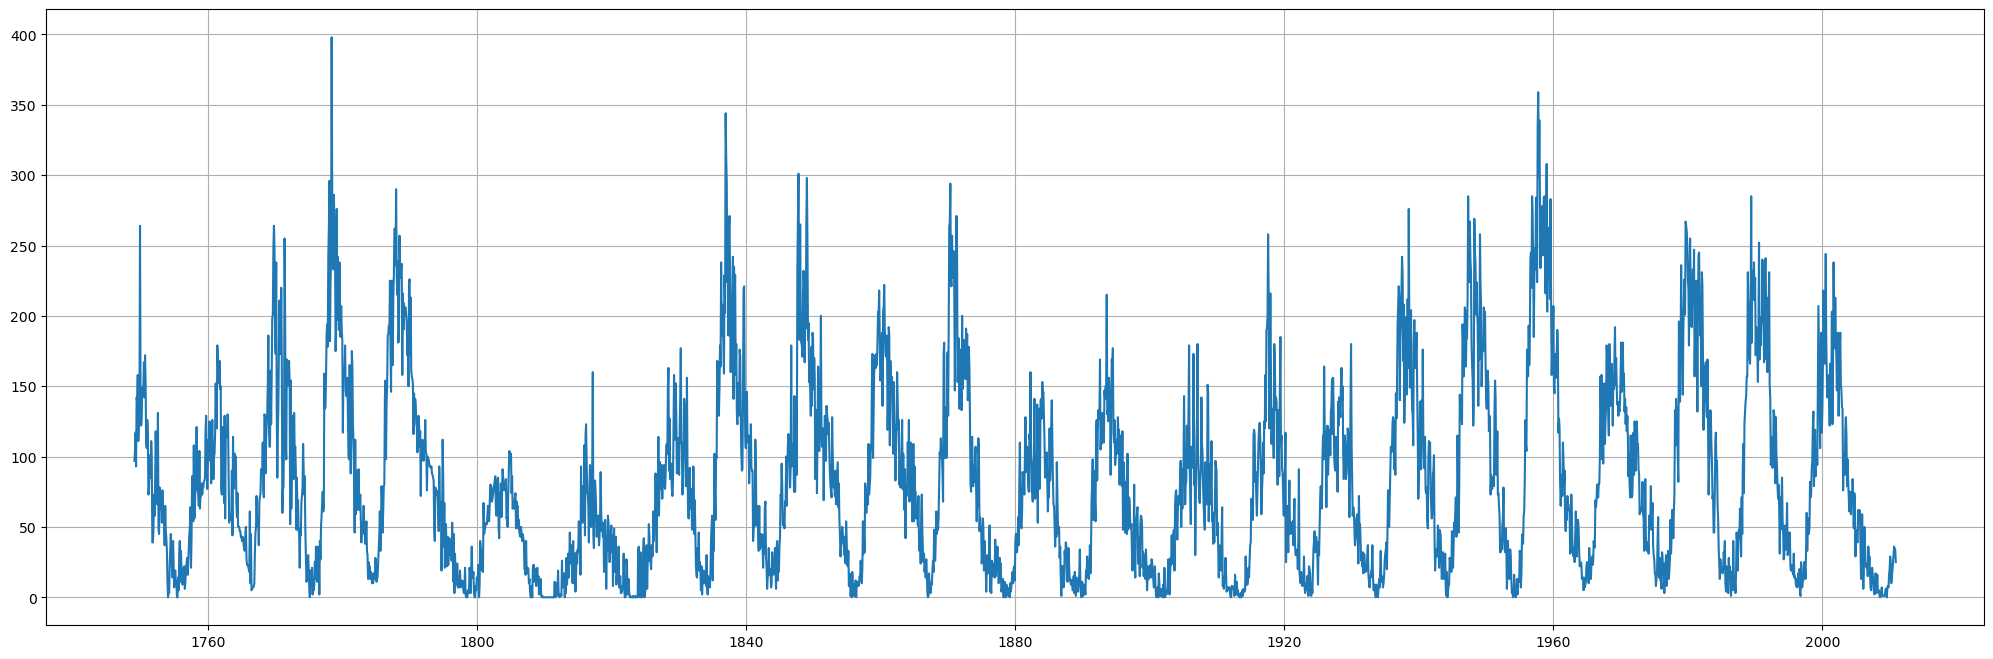

In [3]:
plt.figure(figsize=(25,8))
plt.plot(train_data)
plt.grid()
plt.show()

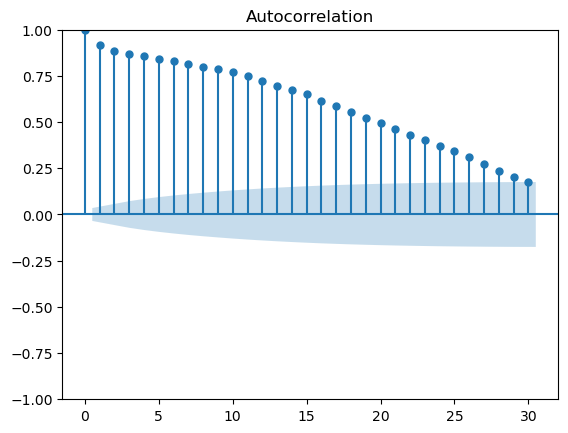

In [4]:
plot_acf(train_data,lags=30);

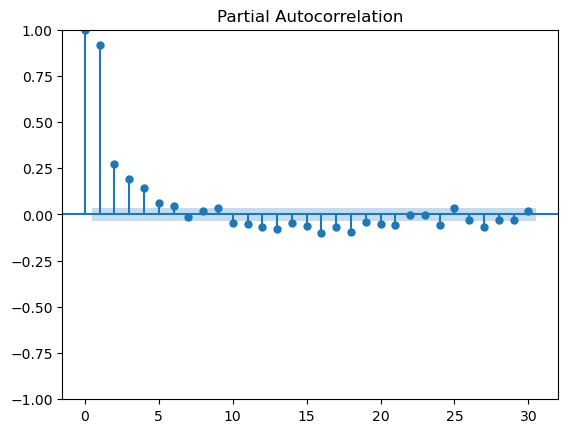

In [5]:
plot_pacf(train_data,lags=30);

In [6]:
train = train_data[ : (train_data.size - 120)]
test = train_data[(train_data.size - 120) : ]

In [7]:
train.tail(2)

,Avg_sunspot_count
Month,
2000-11-01,158
2000-12-01,143


In [8]:
test.head(2)

,Avg_sunspot_count
Month,
2001-01-01,143
2001-02-01,122


In [9]:
train.size, test.size

(3024, 120)

In [10]:
import itertools

p = q = range(0, 3)
d = 0

pdq = list(itertools.product(p, [d], q))
model_pdq = [(x[0], x[1], x[2], 120) for x in pdq]

In [11]:
dfObj1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
dfObj1

,param,seasonal,AIC


In [14]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [15]:
model_pdq

[(0, 0, 0, 120),
 (0, 0, 1, 120),
 (0, 0, 2, 120),
 (1, 0, 0, 120),
 (1, 0, 1, 120),
 (1, 0, 2, 120),
 (2, 0, 0, 120),
 (2, 0, 1, 120),
 (2, 0, 2, 120)]

In [13]:
results_list = []

import statsmodels.api as sm
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
            
        results_SARIMA = mod.fit()
        print('SARIMA{}x{}120 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        #results_list.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic})

#dfObj1 = pd.DataFrame(results_list)

SARIMA(0, 0, 0)x(0, 0, 0, 120)120 - AIC:36905.51660094963
SARIMA(0, 0, 0)x(0, 0, 1, 120)120 - AIC:33662.76107757772


MemoryError: Unable to allocate 1.31 GiB for an array with shape (241, 241, 3025) and data type float64

In [ ]:
new = dfObj1.sort_values(by=['AIC']).reset_index()
new

In [ ]:
model = sm.tsa.statespace.SARIMAX(train, order=new['param'][0], seasonal_order=new['seasonal'][0])
model_Sarima = model.fit()
print(model_Sarima.summary())

In [42]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [43]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],SARIMA_predictions, squared=False)
print(rmse)